# Prot2Text JSON Data Exploration and Analysis

This notebook explores and analyzes the JSON files generated from the Prot2Text dataset. Each JSON file contains protein structure information, embeddings, sequences, and associated metadata.

## 1. Import Required Libraries

In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict
from typing import Dict, List, Any

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load JSON Data

In [2]:
# Define paths to JSON data
json_dir = Path("data/train/json")
json_files = sorted(list(json_dir.glob("*.json")))

print(f"Found {len(json_files)} JSON files")
print(f"\nFirst 5 files:")
for f in json_files[:5]:
    print(f"  - {f.name}")

# Load a sample JSON file to explore structure
sample_file = json_files[0]
print(f"\nLoading sample file: {sample_file.name}")

with open(sample_file, 'r') as f:
    sample_data = json.load(f)

print(f"Sample data loaded successfully!")

Found 10 JSON files

First 5 files:
  - AF-A1VK47-F1-model_v6.json
  - AF-A5GS37-F1-model_v6.json
  - AF-B9KL88-F1-model_v6.json
  - AF-Q05481-F1-model_v6.json
  - AF-Q31F20-F1-model_v6.json

Loading sample file: AF-A1VK47-F1-model_v6.json
Sample data loaded successfully!


## 3. Parse and Inspect JSON Structure

In [3]:
def inspect_json_structure(data: Dict[str, Any], indent: int = 0) -> None:
    """Recursively inspect and print JSON structure."""
    prefix = "  " * indent
    for key, value in data.items():
        if isinstance(value, dict):
            print(f"{prefix}{key}: dict with {len(value)} items")
            if indent < 2:  # Only go 2 levels deep
                inspect_json_structure(value, indent + 1)
        elif isinstance(value, list):
            if len(value) > 0:
                print(f"{prefix}{key}: list with {len(value)} items")
                if isinstance(value[0], (dict, list)):
                    print(f"{prefix}  - First item type: {type(value[0]).__name__}")
                else:
                    print(f"{prefix}  - Item type: {type(value[0]).__name__}, First item: {str(value[0])[:50]}")
            else:
                print(f"{prefix}{key}: empty list")
        else:
            value_str = str(value)[:50] if not isinstance(value, (int, float)) else value
            print(f"{prefix}{key}: {type(value).__name__} = {value_str}")

print("=== JSON Structure ===\n")
inspect_json_structure(sample_data)

=== JSON Structure ===

edge_index: list with 2 items
  - First item type: list
num_nodes: int = 84
node_id: list with 84 items
  - Item type: str, First item: A:MET:1
name: str = AF-A1VK47-F1-model_v6
sequence: list with 1 items
  - Item type: str, First item: MGGFSIWHWLIVLLIVVMVFGTKKLRNMGSDLGGAVKGFKDGMKDGGQSP
distance_matrix: list with 1 items
  - First item type: dict
distance: list with 330 items
  - Item type: float, First item: 3.8848791486994805
coordinates: list with 84 items
  - First item type: list
x: list with 84 items
  - First item type: list
edge_type: list with 330 items
  - Item type: int, First item: 0
sequence_input_ids: list with 1 items
  - First item type: list
prompt_input_ids: list with 1 items
  - First item type: list
description_input_ids: list with 1 items
  - First item type: list


## 4. Extract and Access JSON Elements

In [4]:
# Extract specific elements
print("=== Extracted Elements ===\n")

# Graph-related features
if 'x' in sample_data:
    x = sample_data['x']
    print(f"Node features (x): {len(x)} nodes")
    if len(x) > 0:
        print(f"  - First node features: {x[0][:5]}... (length: {len(x[0])})")

if 'edge_index' in sample_data:
    edge_index = sample_data['edge_index']
    print(f"\nEdge index: {len(edge_index)} edges")
    if len(edge_index) > 0:
        print(f"  - First edge: {edge_index[0]}")

if 'edge_type' in sample_data:
    edge_type = sample_data['edge_type']
    print(f"\nEdge types: {len(edge_type)} types")
    if len(edge_type) > 0:
        print(f"  - First edge type: {edge_type[0]}")

# Sequence and text features
if 'sequence_input_ids' in sample_data:
    seq_ids = sample_data['sequence_input_ids']
    print(f"\nSequence input IDs: shape = {np.array(seq_ids).shape}")
    print(f"  - First few tokens: {seq_ids[0][:10]}")

if 'prompt_input_ids' in sample_data:
    prompt_ids = sample_data['prompt_input_ids']
    print(f"\nPrompt input IDs: shape = {np.array(prompt_ids).shape}")
    
if 'description_input_ids' in sample_data:
    desc_ids = sample_data['description_input_ids']
    print(f"\nDescription input IDs: shape = {np.array(desc_ids).shape}")

if 'name' in sample_data:
    print(f"\nProtein name: {sample_data['name']}")

=== Extracted Elements ===

Node features (x): 84 nodes
  - First node features: [10.0, 360.0, 62.400001525878906, 1.3031915426254272, 245.0]... (length: 67)

Edge index: 2 edges
  - First edge: [0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 46,

## 9. Biological Analysis: Understanding Protein Graph Features

### Graph Node Features (x)
Each node represents a **residue (amino acid)** in the protein sequence.

**Node features breakdown:**
- **Column 0**: Amino acid type (20 standard amino acids) - one-hot encoded position
- **Column 1**: Phi (φ) angle - backbone dihedral angle
- **Column 2**: Psi (ψ) angle - backbone dihedral angle  
- **Column 3**: RSA (Relative Solvent Accessibility) - exposed/buried
- **Column 4**: ASA (Absolute Solvent Accessibility) - surface area
- **Column 5**: Secondary Structure (SS) - coil/helix/sheet/etc
- **Column 6**: Expasy - biochemical property

### Where is 'x' Generated?

The node feature matrix `x` is generated in `dataset/nx2pyg.py` in the `convert_nx_to_pyg()` function.

**Generation Process:**
1. **Amino Acid Encoding** (Column 0):
   - Takes `amino_acid_one_hot` from the NetworkX graph
   - Converts one-hot encoding to class indices using `np.argmax()`
   
2. **Biophysical Features** (Columns 1-6):
   - Iterates through `graph_features = ['phi', 'psi', 'rsa', 'asa', 'ss', 'expasy']`
   - For secondary structure ('ss'): Maps string labels to integers using `map_secondary_structure`
   - For other features: Reshapes to column vectors if needed
   - Concatenates all features horizontally using `np.concatenate()`

**Source Data Flow:**
- PDB files → `pdb2nx.py` (constructs NetworkX graph with node attributes) → `nx2pyg.py` (converts to PyG Data object with `x` matrix)

In [10]:
print("=== NODE FEATURES ANALYSIS ===\n")

# Amino acid mapping (20 standard amino acids)
amino_acids = {
    0: 'A', 1: 'R', 2: 'N', 3: 'D', 4: 'C', 5: 'Q', 6: 'E', 7: 'G',
    8: 'H', 9: 'I', 10: 'L', 11: 'K', 12: 'M', 13: 'F', 14: 'P', 15: 'S',
    16: 'T', 17: 'W', 18: 'Y', 19: 'V'
}

# Feature descriptions
feature_names = ['Amino Acid', 'Phi (φ)', 'Psi (ψ)', 'RSA', 'ASA', 'Secondary Structure', 'Expasy']

x_matrix = np.array(sample_data['x'])
print(f"Node feature matrix shape: {x_matrix.shape}")
print(f"  - Number of residues (nodes): {x_matrix.shape[0]}")
print(f"  - Feature dimensions: {x_matrix.shape[1]}")

print(f"\n=== First 5 residues ===")
for i in range(min(5, len(x_matrix))):
    aa_idx = int(x_matrix[i, 0])
    aa_name = amino_acids.get(aa_idx, 'Unknown')
    phi = x_matrix[i, 1]
    psi = x_matrix[i, 2]
    rsa = x_matrix[i, 3]
    asa = x_matrix[i, 4]
    ss = int(x_matrix[i, 5])
    expasy = x_matrix[i, 6]
    
    ss_map = {0: 'Coil', 1: 'Helix', 2: 'Beta', 3: 'Extended', 4: 'Gamma', 5: 'Isolated', 6: 'Turn', 7: 'Sheet'}
    ss_name = ss_map.get(ss, 'Unknown')
    
    print(f"\nResidue {i+1}:")
    print(f"  Amino Acid: {aa_name}")
    print(f"  Phi (φ): {phi:.2f}°")
    print(f"  Psi (ψ): {psi:.2f}°")
    print(f"  Relative Solvent Accessibility: {rsa:.4f}")
    print(f"  Absolute Solvent Accessibility: {asa:.2f}")
    print(f"  Secondary Structure: {ss_name}")
    print(f"  Expasy Property: {expasy:.4f}")

=== NODE FEATURES ANALYSIS ===

Node feature matrix shape: (84, 67)
  - Number of residues (nodes): 84
  - Feature dimensions: 67

=== First 5 residues ===

Residue 1:
  Amino Acid: L
  Phi (φ): 360.00°
  Psi (ψ): 62.40°
  Relative Solvent Accessibility: 1.3032
  Absolute Solvent Accessibility: 245.00
  Secondary Structure: Coil
  Expasy Property: 2.2800

Residue 2:
  Amino Acid: Q
  Phi (φ): -103.60°
  Psi (ψ): 44.20°
  Relative Solvent Accessibility: 0.9643
  Absolute Solvent Accessibility: 81.00
  Secondary Structure: Coil
  Expasy Property: 2.3400

Residue 3:
  Amino Acid: Q
  Phi (φ): -70.70°
  Psi (ψ): -11.20°
  Relative Solvent Accessibility: 0.6786
  Absolute Solvent Accessibility: 57.00
  Secondary Structure: Coil
  Expasy Property: 2.3400

Residue 4:
  Amino Acid: C
  Phi (φ): -144.90°
  Psi (ψ): 73.70°
  Relative Solvent Accessibility: 0.7665
  Absolute Solvent Accessibility: 151.00
  Secondary Structure: Coil
  Expasy Property: 2.5800

Residue 5:
  Amino Acid: S
  Phi (φ): 

### Graph Edge Features

**Edge types represent different interaction types between residues:**
- **0: Peptide Bond** - Direct covalent bonds in the protein backbone
- **1-2: Sequence Distance** - Residues close in sequence (2-3 positions apart)
- **3: Distance Threshold** - Residues close in 3D space
- **4: Delaunay** - Delaunay triangulation based proximity
- **5: Hydrogen Bond** - H-bonds between residues
- **6: k-NN** - k-nearest neighbors in 3D space

In [6]:
print("=== EDGE ANALYSIS ===\n")

edge_index = np.array(sample_data['edge_index'])
edge_type = np.array(sample_data['edge_type'])
distance = np.array(sample_data['distance'])

print(f"Edge index shape: {edge_index.shape}")
print(f"  - Source and target node indices: {edge_index.shape[0]} (always 2)")
print(f"  - Number of edges: {edge_index.shape[1]}")

print(f"\nEdge type array shape: {edge_type.shape}")
print(f"  - Total edges: {len(edge_type)}")

print(f"\nDistance array shape: {distance.shape}")
print(f"  - Distance between residues: min={distance[0]:.2f}, max={distance[-1]:.2f}")

# Edge type distribution
edge_type_names = {
    0: 'Peptide Bond',
    1: 'Sequence Distance 2',
    2: 'Sequence Distance 3',
    3: 'Distance Threshold',
    4: 'Delaunay',
    5: 'Hydrogen Bond',
    6: 'k-NN'
}

print(f"\n=== Edge Type Distribution ===")
unique_types, counts = np.unique(edge_type, return_counts=True)
for et, count in zip(unique_types, counts):
    edge_name = edge_type_names.get(et, f'Type {et}')
    percentage = (count / len(edge_type)) * 100
    print(f"  {edge_name} (type {et}): {count} edges ({percentage:.1f}%)")

# Show some example edges
print(f"\n=== Sample Edges (first 10) ===")
for i in range(min(10, edge_index.shape[1])):
    source = edge_index[0, i]
    target = edge_index[1, i]
    edge_t = edge_type[i]
    dist = distance[i]
    edge_name = edge_type_names.get(edge_t, f'Type {edge_t}')
    print(f"Edge {i+1}: Residue {source} -- Residue {target} | Type: {edge_name} | Distance: {dist:.2f}Å")

=== EDGE ANALYSIS ===

Edge index shape: (2, 330)
  - Source and target node indices: 2 (always 2)
  - Number of edges: 330

Edge type array shape: (330,)
  - Total edges: 330

Distance array shape: (330,)
  - Distance between residues: min=3.88, max=3.87

=== Edge Type Distribution ===
  Peptide Bond (type 0): 83 edges (25.2%)
  Distance Threshold (type 3): 245 edges (74.2%)
  Hydrogen Bond (type 5): 2 edges (0.6%)

=== Sample Edges (first 10) ===
Edge 1: Residue 0 -- Residue 1 | Type: Peptide Bond | Distance: 3.88Å
Edge 2: Residue 0 -- Residue 3 | Type: Distance Threshold | Distance: 8.99Å
Edge 3: Residue 1 -- Residue 2 | Type: Peptide Bond | Distance: 3.80Å
Edge 4: Residue 1 -- Residue 4 | Type: Distance Threshold | Distance: 7.28Å
Edge 5: Residue 2 -- Residue 3 | Type: Peptide Bond | Distance: 3.85Å
Edge 6: Residue 2 -- Residue 5 | Type: Distance Threshold | Distance: 9.92Å
Edge 7: Residue 2 -- Residue 7 | Type: Distance Threshold | Distance: 9.40Å
Edge 8: Residue 3 -- Residue 4 | 

### Sequence and Text Features

- **sequence_input_ids**: Protein sequence tokenized using ESM (Evolutionary Scale Modeling) tokenizer
- **prompt_input_ids**: Formatted prompt with protein metadata and placeholder tokens
- **description_input_ids**: Functional description tokenized using LLaMA tokenizer

In [14]:
# Load the tokenizers to decode the token IDs
from transformers import AutoTokenizer

# Load ESM tokenizer for sequence
esm_tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t36_3B_UR50D")

# Load LLaMA tokenizer for prompt and description
llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")

print("Tokenizers loaded successfully!")


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Tokenizers loaded successfully!


In [15]:
print("=== SEQUENCE AND TEXT FEATURES ===\n")

# Sequence features
seq_ids = np.array(sample_data['sequence_input_ids'])
print(f"Sequence Input IDs:")
print(f"  Shape: {seq_ids.shape}")
print(f"  Token IDs (first 15): {seq_ids[0][:15]}")
print(f"  Note: Encoded protein sequence from ESM tokenizer")

# Decode sequence
decoded_seq = esm_tokenizer.decode(seq_ids[0], skip_special_tokens=False)
print(f"  Decoded sequence: {decoded_seq}")

# Prompt features  
prompt_ids = np.array(sample_data['prompt_input_ids'])
print(f"\nPrompt Input IDs:")
print(f"  Shape: {prompt_ids.shape}")
print(f"  Contains: System message + protein name + taxon + placeholder tokens")
print(f"  Token IDs (first 15): {prompt_ids[0][:15]}")

# Decode prompt
decoded_prompt = llama_tokenizer.decode(prompt_ids[0], skip_special_tokens=False)
print(f"  Decoded prompt:\n{decoded_prompt}")

# Description features
desc_ids = np.array(sample_data['description_input_ids'])
print(f"\nDescription Input IDs:")
print(f"  Shape: {desc_ids.shape}")
print(f"  Contains: Functional description of the protein")
print(f"  Token IDs (first 15): {desc_ids[0][:15]}")

# Decode description
decoded_desc = llama_tokenizer.decode(desc_ids[0], skip_special_tokens=False)
print(f"  Decoded description:\n{decoded_desc}")

# Metadata
print(f"\nMetadata:")
print(f"  Protein name: {sample_data.get('name', 'N/A')}")


=== SEQUENCE AND TEXT FEATURES ===

Sequence Input IDs:
  Shape: (1, 86)
  Token IDs (first 15): [ 0 20  6  6 18  8 12 22 21 22  4 12  7  4  4]
  Note: Encoded protein sequence from ESM tokenizer
  Decoded sequence: <cls> M G G F S I W H W L I V L L I V V M V F G T K K L R N M G S D L G G A V K G F K D G M K D G G Q S P A D E K P V V P A S Q V T N A Q A A D K A E R N T I D V E A R Q K S <eos>

Prompt Input IDs:
  Shape: (1, 180)
  Contains: System message + protein name + taxon + placeholder tokens
  Token IDs (first 15): [128000 128006   9125 128007    271  38766   1303  33025   2696     25
   6790    220   2366     18    198]
  Decoded prompt:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You are a scientific assistant specialized in protein function predictions. Given the sequence embeddings and other information of a protein, describe its function clearly and concisely in professional language.<|eot_id|><

## 10. Biophysical Properties Analysis

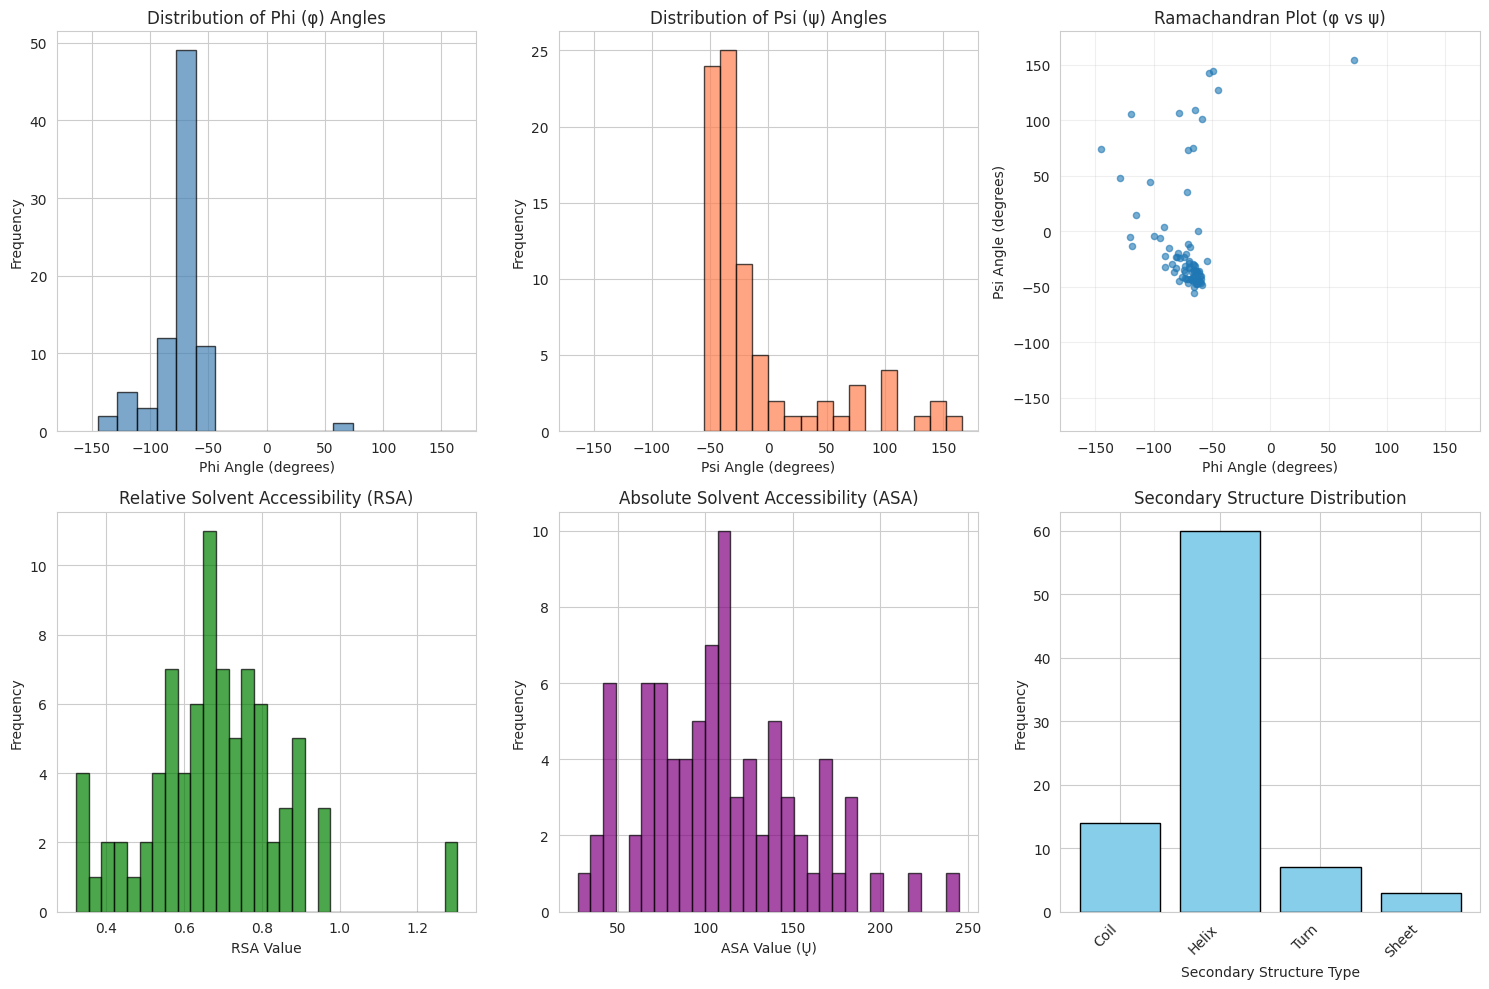

=== BIOPHYSICAL PROPERTIES SUMMARY ===

Phi angles (φ):
  Mean: -67.22°, Std: 52.74°
  Range: [-144.90°, 360.00°]

Psi angles (ψ):
  Mean: -5.50°, Std: 65.93°
  Range: [-55.60°, 360.00°]

Relative Solvent Accessibility (RSA):
  Mean: 0.6833, Std: 0.1785
  Range: [0.3214, 1.3032]
  Buried residues (RSA < 0.25): 0
  Exposed residues (RSA > 0.75): 26

Absolute Solvent Accessibility (ASA):
  Mean: 108.02Ų, Std: 43.58Ų
  Range: [27.00Ų, 245.00Ų]

Secondary Structure Distribution:
  Coil: 14 residues (16.7%)
  Helix: 60 residues (71.4%)
  Turn: 7 residues (8.3%)
  Sheet: 3 residues (3.6%)


In [16]:
# Extract biophysical properties from node features
x_matrix = np.array(sample_data['x'])

phi_angles = x_matrix[:, 1]
psi_angles = x_matrix[:, 2]
rsa_values = x_matrix[:, 3]
asa_values = x_matrix[:, 4]

ss_values = x_matrix[:, 5]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Phi angle distribution (Ramachandran plot component)
axes[0, 0].hist(phi_angles, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribution of Phi (φ) Angles')
axes[0, 0].set_xlabel('Phi Angle (degrees)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(-180, 180)

# Psi angle distribution
axes[0, 1].hist(psi_angles, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_title('Distribution of Psi (ψ) Angles')
axes[0, 1].set_xlabel('Psi Angle (degrees)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(-180, 180)

# Ramachandran plot
axes[0, 2].scatter(phi_angles, psi_angles, alpha=0.6, s=20)
axes[0, 2].set_title('Ramachandran Plot (φ vs ψ)')
axes[0, 2].set_xlabel('Phi Angle (degrees)')
axes[0, 2].set_ylabel('Psi Angle (degrees)')
axes[0, 2].set_xlim(-180, 180)
axes[0, 2].set_ylim(-180, 180)
axes[0, 2].grid(True, alpha=0.3)

# RSA distribution (solvent accessibility)
axes[1, 0].hist(rsa_values, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Relative Solvent Accessibility (RSA)')
axes[1, 0].set_xlabel('RSA Value')
axes[1, 0].set_ylabel('Frequency')

# ASA distribution
axes[1, 1].hist(asa_values, bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Absolute Solvent Accessibility (ASA)')
axes[1, 1].set_xlabel('ASA Value (Ų)')
axes[1, 1].set_ylabel('Frequency')

# Secondary structure distribution
ss_map = {0: 'Coil', 1: 'Helix', 2: 'Beta', 3: 'Extended', 4: 'Gamma', 5: 'Isolated', 6: 'Turn', 7: 'Sheet'}
ss_counts = {}
for ss_val in ss_values:
    ss_idx = int(ss_val)
    ss_name = ss_map.get(ss_idx, f'Type {ss_idx}')
    ss_counts[ss_name] = ss_counts.get(ss_name, 0) + 1

axes[1, 2].bar(ss_counts.keys(), ss_counts.values(), color='skyblue', edgecolor='black')
axes[1, 2].set_title('Secondary Structure Distribution')
axes[1, 2].set_xlabel('Secondary Structure Type')
axes[1, 2].set_ylabel('Frequency')
plt.setp(axes[1, 2].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== BIOPHYSICAL PROPERTIES SUMMARY ===\n")
print(f"Phi angles (φ):")
print(f"  Mean: {np.mean(phi_angles):.2f}°, Std: {np.std(phi_angles):.2f}°")
print(f"  Range: [{np.min(phi_angles):.2f}°, {np.max(phi_angles):.2f}°]")

print(f"\nPsi angles (ψ):")
print(f"  Mean: {np.mean(psi_angles):.2f}°, Std: {np.std(psi_angles):.2f}°")
print(f"  Range: [{np.min(psi_angles):.2f}°, {np.max(psi_angles):.2f}°]")

print(f"\nRelative Solvent Accessibility (RSA):")
print(f"  Mean: {np.mean(rsa_values):.4f}, Std: {np.std(rsa_values):.4f}")
print(f"  Range: [{np.min(rsa_values):.4f}, {np.max(rsa_values):.4f}]")
print(f"  Buried residues (RSA < 0.25): {np.sum(rsa_values < 0.25)}")
print(f"  Exposed residues (RSA > 0.75): {np.sum(rsa_values > 0.75)}")

print(f"\nAbsolute Solvent Accessibility (ASA):")
print(f"  Mean: {np.mean(asa_values):.2f}Ų, Std: {np.std(asa_values):.2f}Ų")
print(f"  Range: [{np.min(asa_values):.2f}Ų, {np.max(asa_values):.2f}Ų]")

print(f"\nSecondary Structure Distribution:")
for ss_name, count in ss_counts.items():
    percentage = (count / len(ss_values)) * 100
    print(f"  {ss_name}: {count} residues ({percentage:.1f}%)")

## 11. Graph Topology Analysis

Understanding the 3D structure connectivity of the protein

=== GRAPH TOPOLOGY ANALYSIS ===

Graph Statistics:
  Number of nodes (residues): 84
  Number of edges: 330
  Edge density: 0.0947

Degree Distribution:
  Average degree: 7.86
  Min degree: 2
  Max degree: 12
  Median degree: 8

Spatial Distance Statistics:
  Mean inter-residue distance: 6.52Å
  Std inter-residue distance: 2.14Å
  Min distance: 3.75Å
  Max distance: 10.00Å

Edge Type Distance Statistics:
  Peptide Bond:
    - Count: 83
    - Mean distance: 3.85Å
    - Range: [3.75Å, 3.90Å]
  Distance Threshold:
    - Count: 245
    - Mean distance: 7.42Å
    - Range: [4.87Å, 10.00Å]
  Hydrogen Bond:
    - Count: 2
    - Mean distance: 6.20Å
    - Range: [6.00Å, 6.39Å]


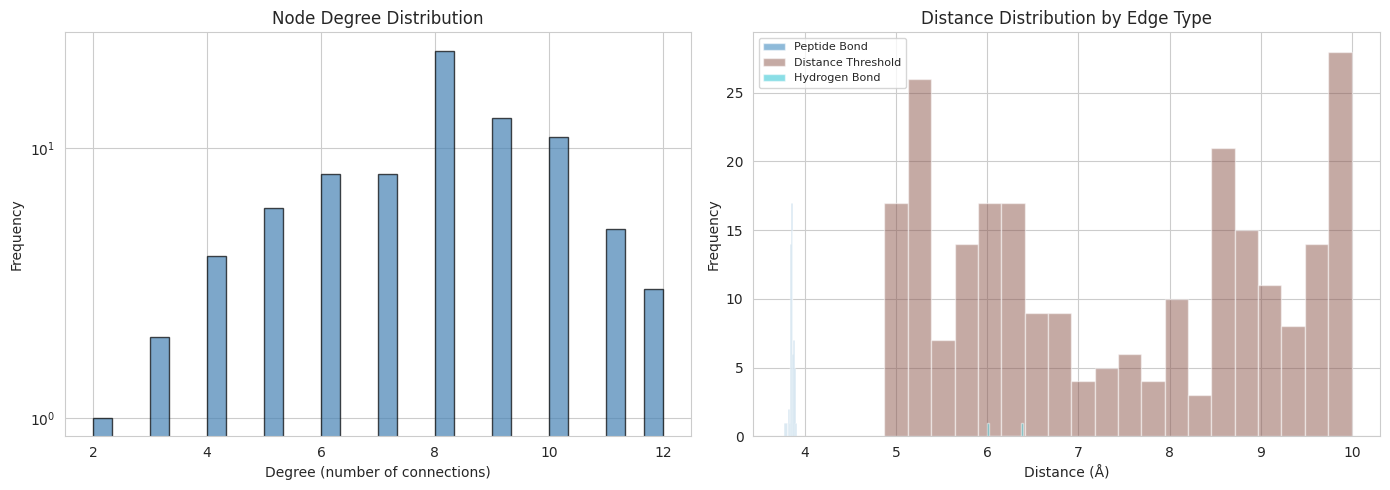

In [17]:
print("=== GRAPH TOPOLOGY ANALYSIS ===\n")

edge_index = np.array(sample_data['edge_index'])
edge_type = np.array(sample_data['edge_type'])
distance = np.array(sample_data['distance'])
num_nodes = len(sample_data['x'])

print(f"Graph Statistics:")
print(f"  Number of nodes (residues): {num_nodes}")
print(f"  Number of edges: {len(edge_type)}")
print(f"  Edge density: {len(edge_type) / (num_nodes * (num_nodes - 1) / 2):.4f}")

# Degree distribution
degree_count = np.zeros(num_nodes)
for source, target in edge_index.T:
    degree_count[source] += 1
    degree_count[target] += 1

print(f"\nDegree Distribution:")
print(f"  Average degree: {np.mean(degree_count):.2f}")
print(f"  Min degree: {int(np.min(degree_count))}")
print(f"  Max degree: {int(np.max(degree_count))}")
print(f"  Median degree: {int(np.median(degree_count))}")

# Distance statistics
print(f"\nSpatial Distance Statistics:")
print(f"  Mean inter-residue distance: {np.mean(distance):.2f}Å")
print(f"  Std inter-residue distance: {np.std(distance):.2f}Å")
print(f"  Min distance: {np.min(distance):.2f}Å")
print(f"  Max distance: {np.max(distance):.2f}Å")

# Edge type by distance
edge_type_names = {
    0: 'Peptide Bond',
    1: 'Sequence Distance 2',
    2: 'Sequence Distance 3',
    3: 'Distance Threshold',
    4: 'Delaunay',
    5: 'Hydrogen Bond',
    6: 'k-NN'
}

print(f"\nEdge Type Distance Statistics:")
for et in sorted(np.unique(edge_type)):
    mask = edge_type == et
    dists = distance[mask]
    edge_name = edge_type_names.get(et, f'Type {et}')
    print(f"  {edge_name}:")
    print(f"    - Count: {np.sum(mask)}")
    print(f"    - Mean distance: {np.mean(dists):.2f}Å")
    print(f"    - Range: [{np.min(dists):.2f}Å, {np.max(dists):.2f}Å]")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Degree distribution
axes[0].hist(degree_count, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Node Degree Distribution')
axes[0].set_xlabel('Degree (number of connections)')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# Distance distribution by edge type
colors = plt.cm.tab10(np.linspace(0, 1, len(np.unique(edge_type))))
for i, et in enumerate(sorted(np.unique(edge_type))):
    mask = edge_type == et
    dists = distance[mask]
    edge_name = edge_type_names.get(et, f'Type {et}')
    axes[1].hist(dists, bins=20, alpha=0.5, label=edge_name, color=colors[i])

axes[1].set_title('Distance Distribution by Edge Type')
axes[1].set_xlabel('Distance (Å)')
axes[1].set_ylabel('Frequency')
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()

## 12. Dataset-Level Biological Insights

=== DATASET-LEVEL BIOLOGICAL INSIGHTS ===

Proteins analyzed: 10

Average Protein Characteristics:
  Average length: 372 ± 352 residues
  Average connectivity: 13.40 connections/residue
  Average spatial distance: 7.16Å

Secondary Structure Content:
  Alpha-helix: 43.2% ± 13.3%
  Beta-sheet: 14.8% ± 9.5%

Solvent Accessibility:
  Average RSA: 0.418 ± 0.167

Interaction Types (per protein):
  Peptide bonds: 370.2 ± 352.0
  Hydrogen bonds: 9.8 ± 10.8
Proteins analyzed: 10

Average Protein Characteristics:
  Average length: 372 ± 352 residues
  Average connectivity: 13.40 connections/residue
  Average spatial distance: 7.16Å

Secondary Structure Content:
  Alpha-helix: 43.2% ± 13.3%
  Beta-sheet: 14.8% ± 9.5%

Solvent Accessibility:
  Average RSA: 0.418 ± 0.167

Interaction Types (per protein):
  Peptide bonds: 370.2 ± 352.0
  Hydrogen bonds: 9.8 ± 10.8


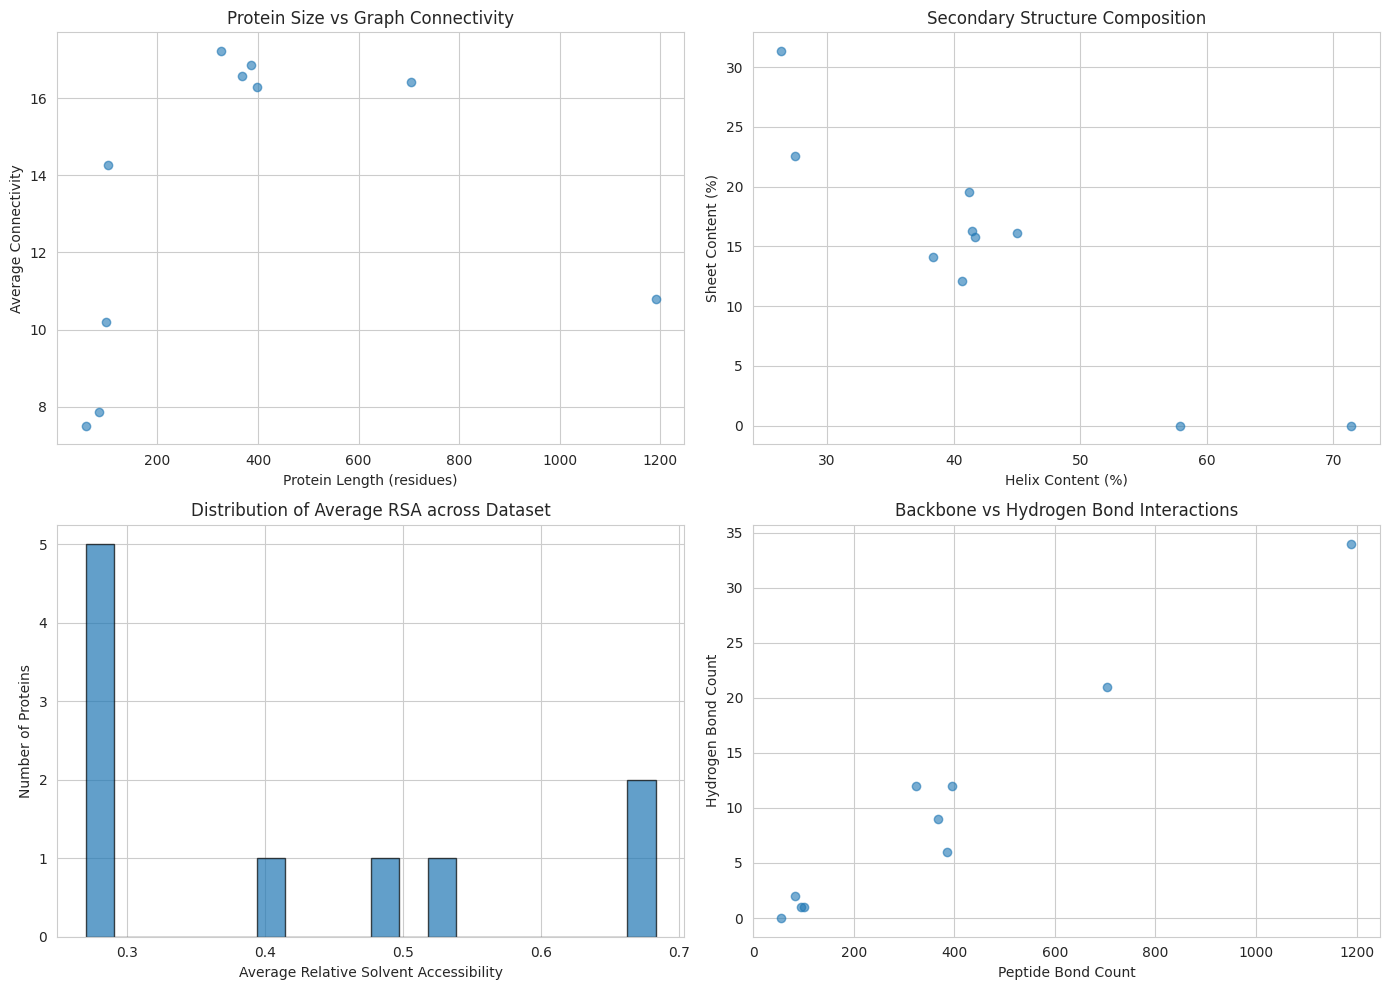


✓ Biological analysis complete!


In [18]:
# Analyze biological patterns across the entire dataset
print("=== DATASET-LEVEL BIOLOGICAL INSIGHTS ===\n")

# Compute graph metrics for all proteins
bio_metrics = []

for json_file in json_dir.glob("*.json"):
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
        
        x_mat = np.array(data['x'])
        edge_index = np.array(data['edge_index'])
        edge_type = np.array(data['edge_type'])
        distance = np.array(data['distance'])
        
        num_nodes = len(x_mat)
        num_edges = len(edge_type)
        
        # Extract secondary structure distribution
        ss_values = x_mat[:, 5]
        ss_counts = {}
        for ss in ss_values:
            ss_counts[int(ss)] = ss_counts.get(int(ss), 0) + 1
        
        metrics = {
            'filename': json_file.name,
            'num_residues': num_nodes,
            'num_edges': num_edges,
            'avg_degree': 2 * num_edges / max(num_nodes, 1),
            'avg_distance': np.mean(distance) if len(distance) > 0 else 0,
            'helix_content': ss_counts.get(1, 0) / max(num_nodes, 1),  # Type 1 = Helix
            'sheet_content': ss_counts.get(3, 0) / max(num_nodes, 1),  # Type 3 = Extended
            'avg_rsa': np.mean(x_mat[:, 3]),
            'peptide_bond_edges': np.sum(edge_type == 0),
            'hbond_edges': np.sum(edge_type == 5),
        }
        bio_metrics.append(metrics)
    except Exception as e:
        pass

df_bio = pd.DataFrame(bio_metrics)

print(f"Proteins analyzed: {len(df_bio)}\n")

print("Average Protein Characteristics:")
print(f"  Average length: {df_bio['num_residues'].mean():.0f} ± {df_bio['num_residues'].std():.0f} residues")
print(f"  Average connectivity: {df_bio['avg_degree'].mean():.2f} connections/residue")
print(f"  Average spatial distance: {df_bio['avg_distance'].mean():.2f}Å")

print(f"\nSecondary Structure Content:")
print(f"  Alpha-helix: {df_bio['helix_content'].mean()*100:.1f}% ± {df_bio['helix_content'].std()*100:.1f}%")
print(f"  Beta-sheet: {df_bio['sheet_content'].mean()*100:.1f}% ± {df_bio['sheet_content'].std()*100:.1f}%")

print(f"\nSolvent Accessibility:")
print(f"  Average RSA: {df_bio['avg_rsa'].mean():.3f} ± {df_bio['avg_rsa'].std():.3f}")

print(f"\nInteraction Types (per protein):")
print(f"  Peptide bonds: {df_bio['peptide_bond_edges'].mean():.1f} ± {df_bio['peptide_bond_edges'].std():.1f}")
print(f"  Hydrogen bonds: {df_bio['hbond_edges'].mean():.1f} ± {df_bio['hbond_edges'].std():.1f}")

# Visualize dataset-level patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df_bio['num_residues'], df_bio['avg_degree'], alpha=0.6)
axes[0, 0].set_xlabel('Protein Length (residues)')
axes[0, 0].set_ylabel('Average Connectivity')
axes[0, 0].set_title('Protein Size vs Graph Connectivity')

axes[0, 1].scatter(df_bio['helix_content']*100, df_bio['sheet_content']*100, alpha=0.6)
axes[0, 1].set_xlabel('Helix Content (%)')
axes[0, 1].set_ylabel('Sheet Content (%)')
axes[0, 1].set_title('Secondary Structure Composition')

axes[1, 0].hist(df_bio['avg_rsa'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Average Relative Solvent Accessibility')
axes[1, 0].set_ylabel('Number of Proteins')
axes[1, 0].set_title('Distribution of Average RSA across Dataset')

axes[1, 1].scatter(df_bio['peptide_bond_edges'], df_bio['hbond_edges'], alpha=0.6)
axes[1, 1].set_xlabel('Peptide Bond Count')
axes[1, 1].set_ylabel('Hydrogen Bond Count')
axes[1, 1].set_title('Backbone vs Hydrogen Bond Interactions')

plt.tight_layout()
plt.show()

print("\n✓ Biological analysis complete!")